## Perceptron Algo on Real Data
Name: Sirpa Sahul <br>
Roll No: 111701028 <br>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random
from sklearn.preprocessing import MinMaxScaler
class perceptron:
    def __init__(self,dim):
        self.w=np.zeros(dim+1)
        self.dim=dim
    def readdata(self,filename):
       # fields=[]
        self.xtrain=[]
        self.ytrain=[]
        self.xtest=[]
        self.ytest=[]
        self.xdata=[]
        self.ydata=[]
        with open(filename,'r') as csvfile:
            csvreader=csv.reader(csvfile)
            for row in csvreader:
                x=[1]
                for i in range(self.dim):
                    x.append(float(row[i]))
                self.xdata.append(x)
                self.ydata.append(float(row[self.dim]))
        sam=random.sample(range(len(self.xdata)),int(len(self.xdata)*0.8))
        
        self.nxdata=MinMaxScaler().fit_transform(self.xdata);
        self.nxtrain=[]
        self.nxtest=[]
        for i in range(len(self.xdata)):
            if i in sam:
                self.xtrain.append(self.xdata[i])
                self.ytrain.append(self.ydata[i])
                self.nxtrain.append(self.nxdata[i])
            else:
                self.xtest.append(self.xdata[i])
                self.ytest.append(self.ydata[i])
                self.nxtest.append(self.nxdata[i])
    def train(self):
        for i in range(len(self.xtrain)):
            if self.ytrain[i]==1 and np.dot(self.w,self.xtrain[i])<0:
                self.w=self.w+self.xtrain[i]
            if self.ytrain[i]==0 and np.dot(self.w,self.xtrain[i])>=0:
                self.w=self.w-self.xtrain[i]
    def convergence(self):
        for i in range(len(self.xtrain)):
            if self.ytrain[i]==1 and np.dot(self.w,self.xtrain[i])<0:
                return False;
            if self.ytrain[i]==0 and np.dot(self.w,self.xtrain[i])>=0:
                return False;
        return True;
    def perceptronalgo(self):
        cnt=0
        self.loss=[self.test()]
        self.cnt=[0]
        self.classificationerr=[(self.test()/len(self.xtrain))*100]
        self.classificationacc=[100-(self.test()/len(self.xtrain))*100]
        while(not self.convergence() and cnt<1000):
            self.train()
            currloss=self.test()
            self.loss.append(currloss)
            self.classificationerr.append((currloss/len(self.xtrain))*100);
            self.classificationacc.append(100-(self.test()/len(self.xtrain))*100)
            cnt+=1
            self.cnt.append(cnt)
            
        
        plt.title("Iteration vs loss")
        #plt.legend()
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.plot(self.cnt,self.loss)
        plt.show()
        
        plt.title("Iteration vs classification error")
        plt.xlabel("Iteration")
        plt.ylabel("Classification error")
        plt.plot(self.cnt,self.classificationerr)
        #plt.legend()
        plt.show()
        
        plt.title("Iteration vs Classification accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Classification accuracy")
        plt.plot(self.cnt,self.classificationacc)
        #plt.legend()
        plt.show()
        
        print("The training results are printed as 5-tuple and it is") 
        print("(classification accuracy ,true positives , true negatives, false positives ,false negatives)")
        self.finaltrainresults=self.analyse(self.xtrain,self.ytrain)
        print("Final training results ",self.finaltrainresults)
        self.finaltestresults=self.analyse(self.xtest,self.ytest)
        print("Final test results ",self.finaltestresults)
    def test(self):
        loss=0
        for i in range(len(self.xtest)):
            if self.ytrain[i]==1 and np.dot(self.w,self.xtrain[i])<0:
                loss+=1
            if self.ytrain[i]==0 and np.dot(self.w,self.xtrain[i])>=0:
                loss+=1
        return loss
    def analyse(self,x,y):
        truepos=0
        trueneg=0
        falsepos=0
        falseneg=0
        for i in range(len(x)):
            if y[i]==1:
                if np.dot(self.w,x[i])>=0:
                    truepos+=1
                else: 
                    falsepos+=1
            elif y[i]==0:
                if np.dot(self.w,x[i])<0:
                    trueneg+=1
                else:
                    falseneg+=1
        classacc=((truepos+trueneg)/len(x))*100
        return (classacc,truepos,trueneg,falsepos,falseneg)
    def normperceptron(self):
        print("\n")
        print("Runnig perceptron on Normalised Data")
        self.xtrain=self.nxtrain
        self.xtest=self.nxtest
        self.w=self.w-self.w
        self.perceptronalgo()
    def plot(self,X,Y):
        mx=np.max(X,0)[1]
        mn=np.min(X,0)[1]
        x=np.linspace(mn,mx,100)
        if(self.w[2]==0):
            y=0
        else:
            y=-(self.w[1]*x+self.w[0])/self.w[2]
        plt.plot(x,y)
        posx=[]
        posy=[]
        negx=[]
        negy=[]
        for i in range(len(X)):
            if Y[i]==1:
                posx.append(X[i][1])
                posy.append(X[i][2])
            else:
                negx.append(X[i][1])
                negy.append(X[i][2])
        plt.scatter(posx,posy)
        plt.scatter(negx,negy)
        plt.show()
                
        

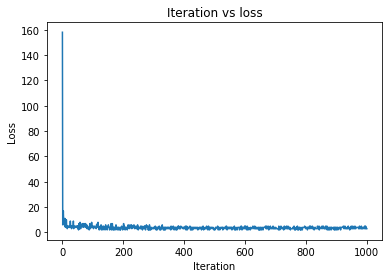

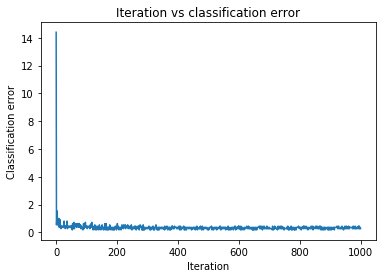

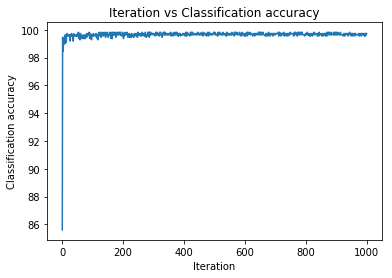

The training results are printed as 5-tuple and it is
(classification accuracy ,true positives , true negatives, false positives ,false negatives)
Final training results  (98.54147675478579, 489, 592, 11, 5)
Final test results  (100.0, 110, 165, 0, 0)
weights for Unnormalised Data [ 267.       -280.67431  -151.556276 -197.327815  -15.639215]


Runnig perceptron on Normalised Data


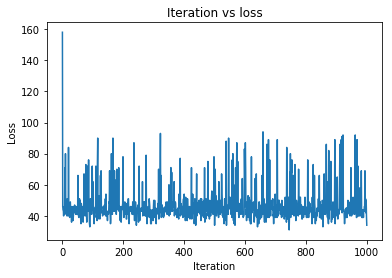

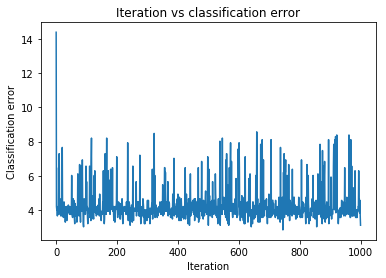

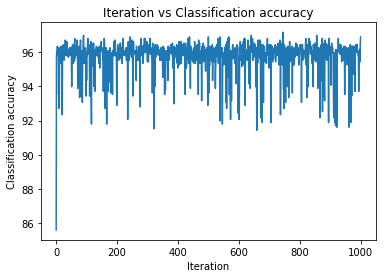

The training results are printed as 5-tuple and it is
(classification accuracy ,true positives , true negatives, false positives ,false negatives)
Final training results  (86.05287146763901, 365, 579, 135, 18)
Final test results  (88.0, 82, 160, 28, 5)
weights for Normalised Data [ 0.         -5.86134554  0.08755794 -0.77562742  4.05459603]


In [16]:
p=perceptron(4)
p.readdata("Dataset Question2.csv")
p.perceptronalgo()
print("weights for Unnormalised Data",p.w)
p.normperceptron()
print("weights for Normalised Data",p.w)

## Analysis
## Before Normalising the Data

The Data is linearly separable <br>
Weights=[ 0.000,-5.861 , 0.088, -0.776 , 4.055], where weight[0] is bias <br>
Analysis on Training Data <br>
Classification Accuracy=98.54% <br>
True Positives=489, True Negatives=592 , False Positives=11, False Negatives=5 <br> <br>
Analysis on Test Data <br>
Classification Accuracy=100% <br>
True Positives=110, True Negatives=165 , False Positives=0, False Negatives=0 <br> <br>

## After Normalising the Data

The Data is linearly separable <br>
Weights=[267.000, -280.674,-151.556, -197.328,-15.639], where weight[0] is bias <br>
Analysis on Training Data <br>
Classification Accuracy=86.05% <br>
True Positives=365, True Negatives=579 , False Positives=135, False Negatives=18 <br> <br>
Analysis on Test Data <br>
Classification Accuracy=88% <br>
True Positives=82, True Negatives=160 , False Positives=28, False Negatives=5<br> <br>

But results were better before Noramlising the Data ,Maybe because of small value of x[i]  requires more iterations for perceptron to converge <br>